In [67]:
!mamba install bs4==4.10.0 -y
!pip install lxml==4.6.4
!mamba install html5lib==1.1 -y
!pip install requests==2.26.0
!pip3 install openpyxl

'mamba' is not recognized as an internal or external command,
operable program or batch file.


'mamba' is not recognized as an internal or external command,
operable program or batch file.


In [149]:
#Libraries Used.
from bs4 import BeautifulSoup as bs  #library for webscaping.
import requests #For requesting data.
import pandas as pd #For DataFrame Manipulation.
import numpy as np
import json #For getting data from json file.
from openpyxl import Workbook # Library for creating workbook.
import os
import seaborn as sns #For Ploting Graphs.
import matplotlib.pyplot as plt #For Ploting Graphs.
import sqlite3 #For Executing Sql Queries.

In [ ]:

#Getting data from the API.

baseurl = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/datasets/githubposting.json" #Used different URL as the given URL is not responding.
def get_number_of_jobs(technology): #Function to get the Technologies and number of jobs.
    no_of_jobs= 0 #initializing
    response = requests.get(baseurl) #requesting for the data.
    if response.ok:             # if all is well() no errors, no network timeouts)
        data = response.json() #reading the json data.
        techno = data.get('technology')
        for item in techno:
            if techno.get(item).lower()==technology.lower(): #This is important cause the data is in various type of case.So we are making it lower case and comparing it.
                no_of_jobs += int(data.get('number of job posting').get(item))   
                
    return technology,no_of_jobs

technologies = ['C','C#','C++','Java','JavaScript','Python','Scala','Oracle','SQL Server','MySQL Server','PostgreSQL','MongoDB']
technologies

wb=Workbook()
ws=wb.active # creating workbook and selecting active worksheet

techno_list = list() #creating empty list.
for language in technologies:
    jobs = get_number_of_jobs(language)
    techno_list.append(jobs)
    
ws.append(['Language', 'Job Postings']) #Appending header.
[ws.append(i) for i in techno_list] #Appending the Technologies and number of jobs.

wb.save("github-job-postings.xlsx") # Saving the workbook

print (os.path.abspath("github-job-postings.xlsx"))
filename="path/github-job-postings.xlsx"
df=pd.read_excel("github-job-postings.xlsx")
print(df)

In [ ]:
#Getting data from cloud about programming languages.

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"
request=requests.get(url)
htmltext=request.text
soup=bs(htmltext,"html.parser")
# print(soup.prettify()) #prints the htmltext we accessed in a well manner.
table = soup.find('table') 
df= pd.DataFrame(columns=["No.","Language","Created by","Average Annual Salary","Learning Difficulty"])
for row in table.tbody.find_all('tr'):
    columns=row.find_all('td')

    if (columns != []):
        a=columns[0]
        b=columns[1]
        c=columns[2]
        d=columns[3]
        e=columns[4]
    
    df=df.append({'No.':a,"Language":b,"Created by":c,"Average Annual Salary":d,"Learning Difficulty":e},ignore_index=True)

df=df.drop(["No.","Created by","Learning Difficulty"],axis=1)
# print(df)

df.to_csv('popular_languages.csv')

In [138]:
# Exploring the Data.

dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"
df=pd.read_csv(dataset_url)#Reading CSV file into Dataframe.
df2=pd.read_csv(dataset_url)
df.head() #Displaying first 5 rows.

df.shape[0] #Number of Rows. 
df.shape[1] #Number of Columns.

df.dtypes # Displays the datatype of all columns.
df['Age'].mean() #Displays the mean of all participants.
len(df['Country'].unique()) #Displays the number of Unique Countries in the DataFrame.

135

In [136]:

# Data Wrangling.

df.duplicated().sum() #Finding the number of Duplicates

df=df.drop_duplicates() # Removing the duplicates execpt first row.

df['WorkLoc'].isnull().sum() #Finding the number of Null Values.

df['WorkLoc'].value_counts() #Noting the most occuring value.

df['WorkLoc'].mode() #Finding the most occured value.

df['WorkLoc']=df['WorkLoc'].fillna('Office') #Replacing the null value with the mode.

df['WorkLoc'].isnull().sum() #Checking for the null values after replacement.

df['CompFreq'].value_counts() #Listing out the various Components of the column CompFreq.

#Creating the new Column NormalizedAnnualCompensation which calculates the compensation for a year.
df.loc[df.CompFreq=='Yearly','NormalizedAnnualCompensation']=df.CompTotal
df.loc[df.CompFreq=='Monthly','NormalizedAnnualCompensation']=df.CompTotal*12
df.loc[df.CompFreq=='Weekly','NormalizedAnnualCompensation']=df.CompTotal*54

df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,NormalizedAnnualCompensation
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,61000.0
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,138000.0
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy,90000.0
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,348000.0
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy,90000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11547,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult,130000.0
11548,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,74400.0
11549,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,34.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy,105000.0
11550,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",NaN,...,NaN,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,80000.0


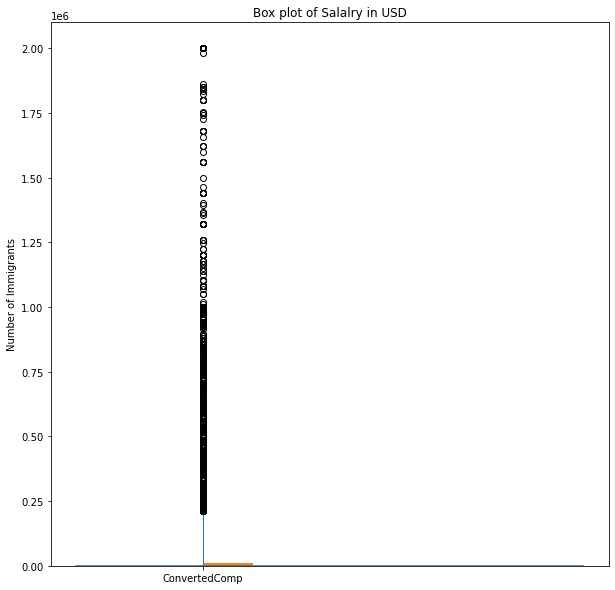

2000000.0
0.0


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.018060,0.021064,-0.013749,0.009149,0.005800
CompTotal,-0.018060,1.000000,-0.065806,0.005061,0.018012,0.006666
ConvertedComp,0.021064,-0.065806,1.000000,0.030720,-0.100202,0.399816
WorkWeekHrs,-0.013749,0.005061,0.030720,1.000000,0.030729,0.036151
CodeRevHrs,0.009149,0.018012,-0.100202,0.030729,1.000000,-0.014857
Age,0.005800,0.006666,0.399816,0.036151,-0.014857,1.000000


In [147]:
# In depth Exploration of Data.

s=df['ConvertedComp'] # Ploting Distribution Curve for the Column ConvertedComp.
s.plot.kde()

df['ConvertedComp'].plot(kind='hist',bins=5) # Ploting Histogram Curve for the Column ConvertedComp.

df['ConvertedComp'].median() #Median for the column ConvertedComp.

df[df['Gender']=='Man']['Gender'].count() #Number of Responders Identifying themselves as Man.

df[df['Gender']=='Woman']['ConvertedComp'].median() #Median of the ConvertedComp for the responders identifying themselves as Woman.

df['Age'].describe() #Five Number summary for the Column Age.

df['Age'].plot(kind='hist',bins=5) #Histogram Curve for the column Age.

#Box plot for the Column ConvertedComp using matplotlib.
df['ConvertedComp'].plot(kind='box', figsize=(10,10))
plt.title('Box plot of Salalry in USD')
plt.ylabel('Number of Immigrants')
plt.show()

#Finding the inner quantile Range for the Column ConvertedComp.
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
IQR

#Finding the Upper and Lower Bounds for the Column ConvertedComp.
upper = df['ConvertedComp'].max()
lower = df['ConvertedComp'].min()
print (upper)
print (lower)

((df['ConvertedComp'] < (Q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (Q3 + 1.5 * IQR))).sum() #Finding the number of outliners for the Column ConvertedComp.

#Creating new Dataframe by removing Outliners from the column ConvertedComp.

mask = (df2['ConvertedComp'] < (Q1 - 1.5 * IQR)) | (df2['ConvertedComp'] > (Q3 + 1.5 * IQR))
df2[mask] = np.nan
df2['ConvertedComp'].mean()

#Finding Correlation between Age and all the other numeric Columns.
df2.corr()

In [181]:
# Visualization of the data.

#Getting the data.
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'
response=requests.get(url)
open('m4_survey_data.sqlite','wb').write(response.content)

conn = sqlite3.connect("m4_survey_data.sqlite") #Connecting to the database.

#Ploting Histogram of the column ConvertedComp.
QUERY = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
ax = sns.histplot(df['ConvertedComp'])

#Ploting Box Plot on the column Age.
query="""
select age from master
"""
df_age=pd.read_sql_query(query,conn)
ax=sns.boxplot(x=df_age['Age'])

#Ploting Scatter Plot for the columns Age and WorkWeekHrs.
query="""
select age,WorkWeekHrs from master
"""
df_sca=pd.read_sql_query(query,conn)
ax=sns.scatterplot(data=df_sca, x='Age', y='WorkWeekHrs')

#Ploting Bubble Plot on the columns WorkWeekHrs and CodeRevHrs using Age Column as Bubble Size.
query="""
select age,WorkWeekHrs,CodeRevHrs from master
"""
df_sca=pd.read_sql_query(query,conn)
ax=sns.scatterplot(data=df_sca,x='WorkWeekHrs', y='CodeRevHrs',size='Age',hue='Age',sizes=(20,200))

#Creating a Pie Chart
QUERY = """
SELECT DatabaseDesireNextYear, count(*) as c1
FROM DataBaseDesireNextYear
group by DatabaseDesireNextYear
order by c1 DESC
"""
df = pd.read_sql_query(QUERY, conn)

# Create the chart
labels = df['DatabaseDesireNextYear'].head(5)
sizes = df['c1'].head(5)
expode = (0,0,0,0,0.1)
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True,)
ax1.axis('equal')  # equal so pie will be drawn as circle

plt.show()

#Ploting Line Graph for the columns Age and ConvertedComp.

QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE age <= 60 AND age >= 45
order by age
"""

df = pd.read_sql_query(QUERY, conn)

l1 = range(45, 60)
l2 = []

for i in l1:
    l2.append(df[df['Age']==i]['ConvertedComp'].median())

# Line chart
plt.figure()
plt.plot(l1, l2)

plt.xlabel('Age')
plt.ylabel('US$')
plt.title('ConvertedComp & Age')
plt.grid(True, linestyle='--')

plt.show()

#Ploting Horizontal bar chat for the mainbranch.
QUERY = """
SELECT MainBranch,count(*) as c
FROM master
group by MainBranch
"""

df = pd.read_sql_query(QUERY, conn)
x=df['c']
y=df['MainBranch']
plt.barh(y,x)
plt.show()

#closing the connection.
conn.close()